<a href="https://colab.research.google.com/github/RahulDogra-92/Supervised-Learning-Pipeline/blob/main/Supervised_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [18]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")  #Ignore the warnings
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , classification_report

In [19]:
train = pd.read_csv('train_s3TEQDk.csv')

In [20]:
# Inspect the first few lines of your data using head()
train.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


In [21]:
# Count the number of missing values in each column
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [22]:
# Fill the missing categorical values with mode
train['Credit_Product'].fillna(str(train['Credit_Product'].mode().values[0]),inplace=True)

In [23]:
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

#Feature Engineering

In [24]:
#List of all column names whose data types are string,
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head(3)

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,NNVBBKZB,Female,RG268,Other,X3,No,No
1,IDD62UNG,Female,RG277,Salaried,X1,No,No
2,HD3DSEMC,Female,RG268,Self_Employed,X3,No,Yes


In [25]:
train_categorical.drop(['ID'],axis=1,inplace=True)
train_categorical.head(3)

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,Female,RG268,Other,X3,No,No
1,Female,RG277,Salaried,X1,No,No
2,Female,RG268,Self_Employed,X3,No,Yes


In [26]:
# Create a label encoder for each column. Encode the values
le = preprocessing.LabelEncoder()
train_categorical = train_categorical.apply(le.fit_transform)
train_categorical.head(3)

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,18,1,2,0,0
1,0,27,2,0,0,0
2,0,18,3,2,0,1


In [27]:
# Inspect the data types of the columns of the data frame
print(train_categorical.dtypes)

Gender            int64
Region_Code       int64
Occupation        int64
Channel_Code      int64
Credit_Product    int64
Is_Active         int64
dtype: object


In [28]:
train = train.drop(train.select_dtypes(include=['object']), axis=1)
train = pd.concat([train,train_categorical], axis=1)
train.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,73,43,1045696,0,0,18,1,2,0,0
1,30,32,581988,0,0,27,2,0,0,0
2,56,26,1484315,0,0,18,3,2,0,1
3,34,19,470454,0,1,20,2,0,0,0
4,30,33,886787,0,0,32,2,0,0,0


In [29]:
train['Is_Lead'] = train['Is_Lead'].astype('category')

In [30]:
#For train dataset
X = train.drop('Is_Lead',axis=1)
y = train['Is_Lead']

#Your First Pipeline

In [31]:
# Split the data into train and test, with 20% as test
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

In [32]:
# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [33]:
# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)

In [34]:
# Assess the accuracy of both classifiers
print(accuracy_score(y_test, rf_predictions))
print("Classification Report: \n", classification_report(y_test, rf_predictions))

0.7796113541560687
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86     37615
           1       0.55      0.31      0.40     11530

    accuracy                           0.78     49145
   macro avg       0.68      0.62      0.63     49145
weighted avg       0.75      0.78      0.76     49145



#Model complexity and overfitting

Grid search CV for model complexity


In [35]:
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50, 10)}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

{'n_estimators': 40}

#Adapt your code to optimise n_estimators for an AdaBoostClassifier().

In [36]:
# Define a grid for n_estimators ranging from 1 to 10
param_grid = {'n_estimators': range(1, 11)}

# Optimize for a AdaBoostClassifier() using GridSearchCV
grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_estimators': 9}

#Adapt your code to optimise n_neighbors for an KNeighborsClassifier().

In [37]:
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [10, 50, 100]}

# Optimize for KNeighborsClassifier() using GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3)
grid.fit(X, y)
grid.best_params_

{'n_neighbors': 100}


# Number of trees and estimators

Random forests are an ensemble over a large number of decision trees. The number of trees used is controlled by a parameter called n_estimators

#Feature Importance

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[0.20047606 0.21266944 0.30359348 0.00918585 0.14003558 0.05159282
 0.05357651 0.01346406 0.0154062 ]


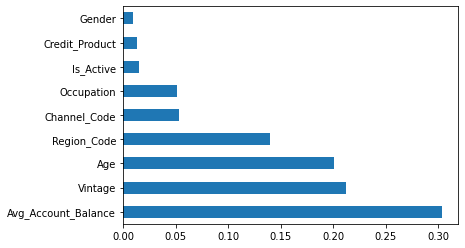

In [38]:
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#Bringing it all together


Feature selection method: SelectKBest


Score function:

For regression: f_regression, mutual_info_regression

For classification: chi2, f_classif, mutual_info_classif

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com

In [39]:
# Find the best value for max_depth among values 2, 5 and 10
grid_search = GridSearchCV(
  RandomForestClassifier(random_state=1), param_grid={'max_depth': [2, 5, 10]})
best_value = grid_search.fit(
  X_train, y_train).best_params_['max_depth']

# Using the best value from above, fit a random forest
clf = RandomForestClassifier(
  random_state=1, max_depth=best_value).fit(X_train, y_train)

# Apply SelectKBest with chi2 and pick top 9 features
vt = SelectKBest(chi2, k=5).fit(X_train, y_train) #chi2 used for classification problem

# Create a new dataset only containing the selected features
X_train_reduced = vt.transform(X_train)

#Imperfect Labels

Dealing with label noise


In [40]:
y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Method3: SMOTE

In [41]:
import numpy as np

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)
np.array(np.unique(y_sm, return_counts=True)).T

array([[     0, 187437],
       [     1, 187437]])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [43]:
# Create a random forest classifier, fixing the seed to 2
rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, y_train)
# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)
# Assess the accuracy of both classifiers
print(accuracy_score(y_test, rf_predictions))

0.7969056352117373


In [44]:

print("Classification Report: \n", classification_report(y_test, rf_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80     37488
           1       0.81      0.77      0.79     37487

    accuracy                           0.80     74975
   macro avg       0.80      0.80      0.80     74975
weighted avg       0.80      0.80      0.80     74975



#From Workflow to Pipelines

Your first pipeline

In [45]:
from sklearn.pipeline import Pipeline
# Create pipeline with feature selector and classifier
pipe = Pipeline([
    ('feature_selection', SelectKBest(chi2)),
    ('clf', RandomForestClassifier(random_state=2))])

# Create a parameter grid
params = {
   'feature_selection__k':[5, 9],
   'clf__n_estimators':[2, 5]}

# Initialise the grid search object
grid_search = GridSearchCV(pipe, param_grid=params)

# Fit it to the data and print the best value combination
print(grid_search.fit(X_train, y_train).best_params_)

{'clf__n_estimators': 5, 'feature_selection__k': 9}


In [46]:
#Convert the metric roc_auc_score() into a scorer, and feed it into GridSearchCV(). Then fit that to the data.
from sklearn.metrics import roc_auc_score , make_scorer
# Create a custom scorer
scorer = make_scorer(roc_auc_score) # The function that converts metrics to scorers is called make_scorer().

# Initialize the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer)

# Fit it to the data and print the winning combination
print(gs.fit(X_train, y_train).best_params_)

{'clf__n_estimators': 5, 'feature_selection__k': 9}


In [47]:
#The optional parameter in GridSearchCV() that controls the choice of scoring function is called scoring.
#Now repeat for the F1 score, instead, given by f1_score().
from sklearn.metrics import f1_score
# Create a custom scorer
scorer = make_scorer(f1_score)

# Initialise the CV object
gs = GridSearchCV(pipe, param_grid=params, scoring=scorer)

# Fit it to the data and print the winning combination
print(gs.fit(X_train, y_train).best_params_)

{'clf__n_estimators': 5, 'feature_selection__k': 9}


#Serializing your model

Store a classifier to file:

In [49]:
import pickle

# Save it to a file, to be pushed to production
with open('model_pickle','wb') as file:
  pickle.dump(rf_model, file = file)

In [52]:
# Now load the model from file in the production environment
with open('model_pickle', 'rb') as file:
    clf_from_file = pickle.load(file)

# Predict the labels of the test dataset
preds = clf_from_file.predict(X_test)
preds

array([0, 0, 0, ..., 0, 1, 0])

#Serializing your pipeline

Development environment

In [ ]:
pipe = Pipeline([
                 ('fs', SelectKBest(chi2)),  
                 ('clf', RandomForestClassifier())])
params = dict(fs__k=[2, 3, 4],  
        clf__max_depth=[5, 10, 20])
gs = GridSearchCV(pipe, params)
gs = gs.fit(X_train, y_train)
with open('pipe.pkl', 'wb') as file:  
    pickle.dump(gs, file)

#Serializing your pipeline

Production environment

In [ ]:
with open('pipe.pkl', 'rb') as file: 
    gs = pickle.dump(gs, file)
gs.predict(X_test)


#Cross-validation statistics


In [53]:
# Fit your pipeline using GridSearchCV with three folds
grid_search = GridSearchCV(
  pipe, params, cv=3, return_train_score=True)

# Fit the grid search
gs = grid_search.fit(X_train, y_train)

# Store the results of CV into a pandas dataframe
results = pd.DataFrame(gs.cv_results_)

# Print the difference between mean test and training scores
print(
  results['mean_test_score']-results['mean_train_score'])

0   -0.198420
1   -0.161714
2   -0.238779
3   -0.203999
dtype: float64


The difference between training and test performance seems quite big here, and that is always a telltale sign of overfitting!